

```
# This is formatted as code
```

### *** Names: Juli, Ryogo ***

#### Enter the number of minutes that you spent on this lab (outside of class) here: https://forms.gle/pUDDsFXWJRhwa7hV9

# Lab 2: Milky Way properties

In [1]:
from google.colab import drive
drive.mount('/content/drive')
import sys

Mounted at /content/drive


In [2]:
# TODO: modify this path to match wherever you've saved all the lab datafiles
sys.path.append('/content/drive/MyDrive')

## Day 1: The Milky Way rotation curve

In [3]:
# Import some useful packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy.units as u

### Part 1: Read observed data

First let's look at some compiled rotation curve data measured using different observational tracers.

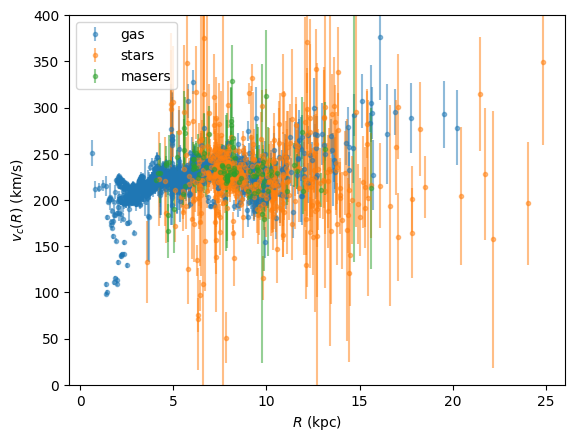

In [4]:
# Just run this code - don't edit!

# Plot raw observed data from files
tracers = ['gas','stars','masers']
for tracer in tracers:
    vcdata = pd.read_csv('/content/drive/MyDrive/Academic/2025S/ASTR 352/Lab02/vcdata_baseline_'+tracer+'.dat', delimiter='\t', skiprows=1)
    plt.errorbar(vcdata['R[kpc]'], vcdata['vc[km/s]'], yerr=vcdata['delta_vc[km/s]'], linestyle='None', marker='.', label=tracer, alpha=0.5)

plt.legend(loc='best')
plt.xlabel(r'$R$ (kpc)')
plt.ylabel(r'$v_{c}(R)$ (km/s)')
plt.ylim(0,400)
plt.show()

***Questions***
1. What are the tracers used to measure the rotation curves in this plot?

*Gas, Stars and Masers*

2. What's a "maser"? Use your Googling skills to write a short (1-2 sentence) explanation of what a maser is.

*It's a source of emission that usually emits microwave portion in spectrum. In the space, the source is usually molecular clouds and atmospheres.*


### Part 2: Cleaning up the data

Yikes, that last plot is pretty messy. Let's see if we can clean it a bit by "binning" the data. Here's a function to do this binning:

In [5]:
# Just run this code - don't edit!

def bindata(r, v, verr, binrange=(0.1,3), binsize=0.1):
    '''Bin rotation curve data.

    Inputs:
        r (array): Array of radius data (normalized by R0)
        v (array): Array of circular velocity data (normalized by v0)
        verr (array): Array of circular velocity errors (normalized by v0)

    Keywords:
        binrange (tuple): Range for bins
        binsize (float): Size of bins

    Returns:
        bin_centers (array): Center of each bin
        bin_means, bin_std (array): Means and standard deviations in each bin
        '''

    # Define bins
    bins = np.linspace(1,25,25)
    bin_centers = np.diff(bins)/2. + bins[:-1]

    # Sort data into bins
    digitized = np.digitize(r, bins)
    bin_means = [np.average(v[digitized == i], weights=1./verr[digitized ==i]**2.) if len(verr[digitized ==i])>0 else np.nan for i in range(1, len(bins))]
    bin_std = [np.average(verr[digitized == i]) if len(verr[digitized ==i])>0 else np.nan for i in range(1, len(bins))]

    return bin_centers, bin_means, bin_std

Now let's actually plot the binned data:

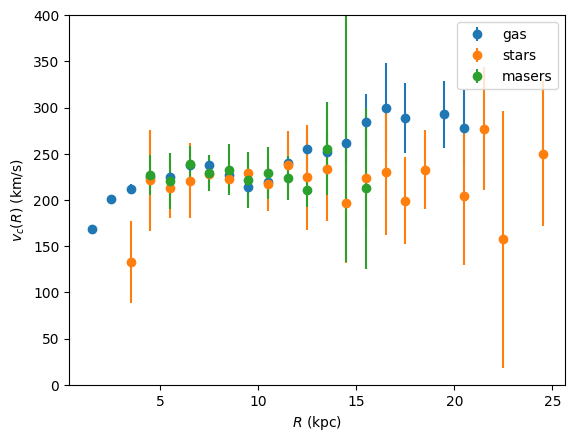

In [7]:
# Just run this code - don't edit!

# Define some lists to store combined data
r_all, v_all, verr_all = [], [], []

# Plot binned data
tracers = ['gas','stars','masers']
for tracer in tracers:

    # Open data
    vcdata = pd.read_csv('/content/drive/MyDrive/Academic/2025S/ASTR 352/Lab02/vcdata_baseline_'+tracer+'.dat', delimiter='\t', skiprows=1)
    r = vcdata['R[kpc]']
    v = vcdata['vc[km/s]']
    verr = vcdata['delta_vc[km/s]']

    # Add to list of all data
    r_all.append(r.values)
    v_all.append(v.values)
    verr_all.append(verr.values)

    # Plot binned data
    bin_centers, bin_means, bin_std = bindata(r, v, verr)
    plt.errorbar(bin_centers, bin_means, yerr=bin_std, linestyle='None', marker='o', label=tracer)

# Create arrays of the combined tracer data
r_all, v_all, verr_all = np.hstack(r_all), np.hstack(v_all), np.hstack(verr_all)

# Format the plot
plt.legend(loc='best')
plt.xlabel(r'$R$ (kpc)')
plt.ylabel(r'$v_{c}(R)$ (km/s)')
plt.ylim(0,400)
plt.show()

That looks a bit cleaner! Let's try combining all the tracers.

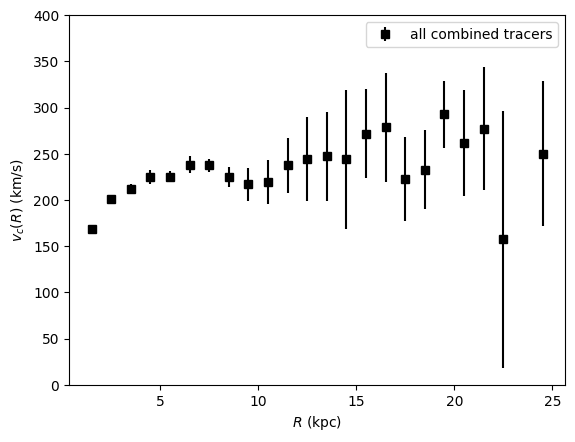

In [9]:
# TODO: Modify the code below to run the binning function bindata() on the combined tracer data

combined_centers, combined_means, combined_std = bindata(r_all, v_all, verr_all)
plt.errorbar(combined_centers, combined_means, yerr=combined_std, linestyle='None', color='k', marker='s', label='all combined tracers')

plt.legend(loc='best')
plt.xlabel(r'$R$ (kpc)')
plt.ylabel(r'$v_{c}(R)$ (km/s)')
plt.ylim(0,400)
plt.show()

***Questions***

Let's estimate the mass of the Milky Way from its rotation curve!

1. Recall that a mass $m$ orbiting around the Milky Way (with circular velocity $v_{c}$ at radius $R$) experiences a gravitational force from the Milky Way's mass enclosed within $R$, which we'll call $M_{dyn}$. Implement a formula for $M_{dyn}$ (as a function of $R$, $v_{c}$, and the gravitational constant $G$) into the following function:

In [11]:
def compute_Mdyn(R_kpc, v_kms):
    '''Compute the dynamical mass (i.e., the enclosed mass within radius R).

    Inputs:
        R (float): radius (in kpc)
        v (float): circular velocity (in km/s)

    Outputs:
        Mdyn (float): dynamical mass (in Msun)
    '''

    # Constants
    G = 6.67e-8  # erg cm g^-2
    Msun = 2e33  # g

    # Convert all inputs to CGS units
    R = R_kpc * 3.1e21  # cm
    v = v_kms * 1e5  # cm/s

    # TODO: Put your formula for Mdyn here, using the CGS variables!
    Mdyn = R * (v**2)/G

    # Convert Mdyn to solar masses
    Mdyn /= Msun

    return Mdyn

2. Use your function and the observed rotation curve (using combined tracers) to compute the mass of the Milky Way out to 15 kpc (approximately the radius of the visible stellar disk):

In [13]:
# TODO: Put in values from the observed rotation curve
Mdyn = compute_Mdyn(15, 260)
print(Mdyn)

235637181409.29535


3. Look up the estimated *stellar* mass of the Milky Way from this paper: [Licquia & Newman (2015), ApJ, 806, 96](https://ui.adsabs.harvard.edu/abs/2015ApJ...806...96L/abstract). What is the ratio of (stellar mass)/(total mass)?

In [16]:
# Cell for computing answer to question 3:
(6.08 *(10**10))/Mdyn

0.25802379588980084

Okay, the mass from the Milky Way's stars isn't enough to explain the galaxy rotation curve. What if we account for gas?

4. From observations, we estimate that the gas fraction of the Milky Way (defined as $f_{gas}=M_{gas}/(M_{gas}+M_{stars})$) is 10% at most (Wiklind et al. 2019). What's the total gas mass of the Milky Way? What's the ratio of (stellar + gas mass)/(total mass)?

In [19]:
# Cell for computing answers to question 4:
print("The total gas mass of the Milky Way is", Mdyn*.1)
((6.08 *(10**10))+(Mdyn*.1))/ Mdyn

The total gas mass of the Milky Way is 23563718140.929535


0.3580237958898009

Clearly some other, non-visible, massive component is needed to match the Milky Way's rotation curve!

## Day 2: The Milky Way compared to other galaxies
Now that we have a sense of the Milky Way's properties (especially its mass), let's see how the Milky Way compares to other galaxies.

In [20]:
# Import some useful packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy.units as u
import astropy.cosmology.units as cu
from astropy.cosmology import Planck13
import seaborn as sns

### Part 1: The galaxy stellar mass function

Let's first compare the Milky Way's mass with other galaxies. Is our Milky Way more or less massive than most galaxies? To answer this, we need to consider the galaxy ***stellar mass function***. This is the *number density* of galaxies (i.e., number of galaxies per volume) as a function of their stellar mass.

The galaxy mass function is often described using something called the Schechter function:
the number density of galaxies with masses in the interval $[M,M+dM]$ is $n_{gal} = n_{\star}e^{-M/M^{\star}}\left(\frac{M}{M^{\star}}\right)^{\alpha}dM$

Since stellar mass is often plotted in $\log_{10}$ units (ex. $\log_{10}(M_{\star}/M_{\odot})=11$), we'll write this in log form:
the number density of galaxies per *logarithmic* mass bin is $n_{gal} = \ln(10)n_{\star}e^{-10^{\log M-\log M^{\star}}}\left(10^{\log M-\log M^{\star}}\right)^{\alpha +1}d\log M$

Let's plot this function:

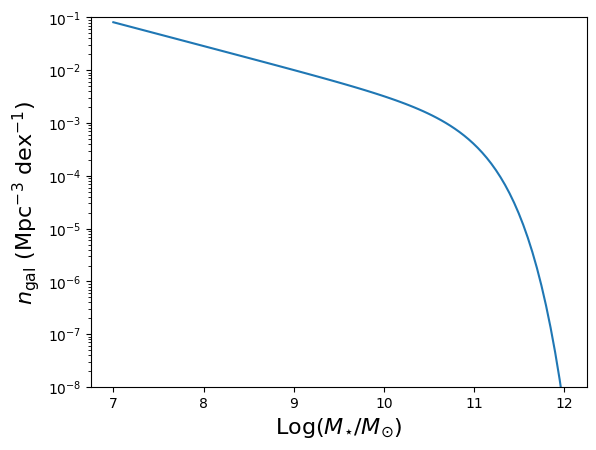

In [21]:
# Just run this code - don't edit!

def logschechter(logM, nstar=0.60, alpha=-1.45, logMstar=10.93):
    '''Compute logarithmic Schechter function.
    Inputs:
        logM (array): array of log10(M/Mstar) to compute Schechter function for

    Keywords:
        nstar, alpha, logMstar (float): free parameters in Schechter fit;
            note that nstar has units 1e-3/Mpc^3/dex, logMstar has units [Msun]
            (default values taken from Weaver+22)

    Outputs:
        ngal (array): Schechter function computed at logM
    '''

    ngal = np.log(10)*nstar*1e-3*np.exp(-10**(logM-logMstar))*(10**(logM-logMstar))**(alpha+1)

    return ngal

logM = np.linspace(7,12,100)
plt.plot(logM,logschechter(logM))
plt.yscale('log')
plt.ylim(1e-8,1e-1)
plt.ylabel('$n_{\mathrm{gal}}$ (Mpc$^{-3}$ dex$^{-1}$)', fontsize=16)
plt.xlabel('Log$(M_{\star}/M_{\odot})$', fontsize=16)
plt.show()

***Questions***

1. Let's think about what this plot is actually telling us. Are high-mass galaxies or low-mass galaxies more common?

*Low-mass galaxies are more common, since the number density is higher at smaller mass.*

2. Astronomers also often talk about the galaxy "luminosity function," which is the same thing but as a function of luminosity instead of stellar mass. Do you expect the luminosity function to have a similar shape as the stellar mass function? Why or why not?

*It should have a similar shape, since the luminosity is higher when the mass is higher.*

Let's plot the location of the Milky Way on this function. (Recall from the first part of the lab that the stellar mass of the Milky Way is approximately $M_{\star}=6\times10^{10}~M_{\odot}$.)

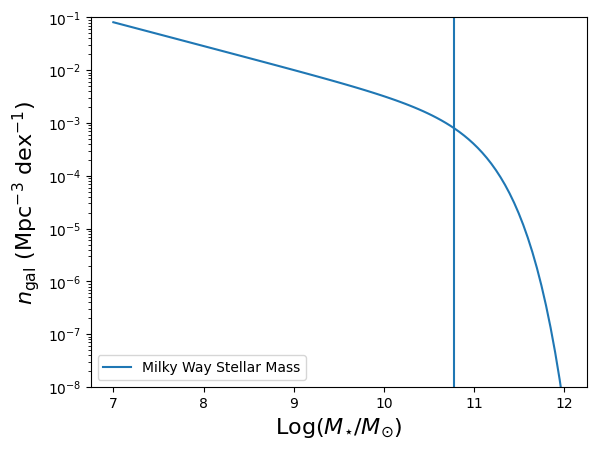

In [27]:
# TODO: Add a line of code to plot the Milky Way's mass as a vertical line. Add a label and a legend too!
# (Hint: look up the function plt.axvline)

logM = np.linspace(7,12,100)
plt.plot(logM,logschechter(logM))
plt.axvline(x=(np.log10(6*(10**10))), label='Milky Way Stellar Mass')
# Add a line of code here!

plt.legend(loc='best')
plt.yscale('log')
plt.ylim(1e-8,1e-1)
plt.ylabel('$n_{\mathrm{gal}}$ (Mpc$^{-3}$ dex$^{-1}$)', fontsize=16)
plt.xlabel('Log$(M_{\star}/M_{\odot})$', fontsize=16)
plt.show()

***Questions***

3. What is the approximate number density of galaxies around the same mass as the Milky Way (say, between $10<\log(M_{*}/M_{\odot})<11$)? You can read this off the plot, or use the `logschechter` function to get an answer.
*The number density is approximately 10^-3.*

4. Interestingly, the Milky Way's mass is close to the "knee" of the mass function (e.g., the mass above which there's a sharp drop off). The location of this knee is set by the variable $M^{*}$ (the keyword `logMstar=10.93` in the `logschechter()` function)---as a result, galaxies with masses similar to the Milky Way are sometimes called $M^{*}$ (pronounced "M-star") galaxies. What does the Milky Way mass being near $M^{*}$ suggest about the density of galaxies much more massive than the Milky Way?
*The density of galaxies more massive than the Milky Way are rapidly decreasing on the plot. This means that there are not many galaxies more massive than the Milky Way.*


### Part 2: The galaxy color-magnitude diagram

Now let's compare other properties of the Milky Way with other galaxies. As we saw in class, two of the easiest galaxy properties to measure are galaxy brightness (as measured by their *magnitude*) and *color*.

First, let's review how we quantify the color of an astrophysical object from observations. Remember that we can measure the light of a galaxy in several filters that only allow light from certain wavelengths to pass through. Observational astronomers usually define "color" as (magnitude in a bluer filter) - (magnitude in a redder filter).

***Questions***

1. Consider two stars whose magnitudes we measure in B and V filters (B is bluer than V). Star 1 has $m_{B}=2.27$ and $m_{V}=0.42$, while Star 2 has $m_{B}=0.03$ and $m_{V}=0.03$. What are their $B-V$ colors?
*Star 1's B-V color is 1.85. Star 2's B-V color is 0.*

2. Which star is more blue? (Remember that brighter objects have **lower** magnitudes!)
*Star 2 is more blue.*

Okay, now that we understand how observational colors are defined, let's plot the colors and magnitudes of nearby galaxies.

In [29]:
# Just run this code - don't edit!

# Read in data from the Sloan Digital Sky Survey
sdss = pd.read_csv('/content/drive/MyDrive/Academic/2025S/ASTR 352/Lab02/sdss.csv', skiprows=1)

# Convert redshift to distance
sdss['dist_pc'] = [((i * cu.redshift).to(u.pc, cu.redshift_distance(Planck13, kind='comoving'))).value for i in sdss['redshift']]

# Also clean the data a bit
sdss['u'][sdss['u'] < -990] = np.nan

<ipython-input-29-8e5eca3f75aa>:10: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  sdss['u'][sdss['u'] < -990] = np.nan


The data table lists apparent magnitude, but we want to plot absolute magnitude. So let's convert apparent to absolute magnitude, using the distance modulus formula:

In [30]:
# TODO: Convert the r-band apparent magnitude to r-band absolute magnitude
# (Hint: your answer should involve sdss['dist_pc'] and sdss['r'])
sdss['M_r'] = sdss['r'] - (5* np.log10(sdss['dist_pc'])-5)

Now let's make a color-magnitude diagram!

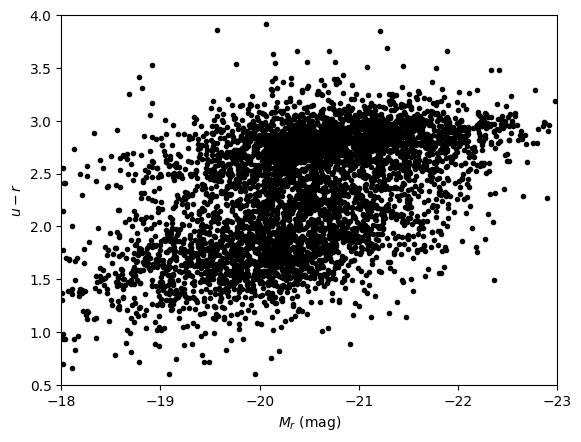

In [31]:
# TODO: Now plot r-band absolute magnitude on the x-axis and u-r color on the y-axis
plt.plot(sdss['M_r'], sdss['u']-sdss['r'], color='k', marker='.', linestyle='None')

plt.xlabel(r'$M_{r}$ (mag)')
plt.ylabel(r'$u-r$')
plt.xlim(-18,-23)
plt.ylim(0.5,4.0)
plt.show()

Hmm, it's kind of hard to see all the points here. Let's try drawing contour lines to show the density of points using the `seaborn` package.

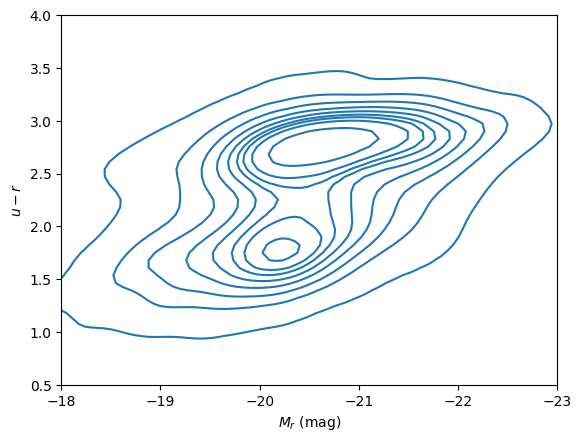

In [32]:
# TODO: Fill in the x and y keywords.
# If you're not sure what they're supposed to be, check the kdeplot documentation: https://seaborn.pydata.org/generated/seaborn.kdeplot.html
sns.kdeplot(x=sdss['M_r'], y=sdss['u']-sdss['r'])

plt.xlabel(r'$M_{r}$ (mag)')
plt.ylabel(r'$u-r$')
plt.xlim(-18,-23)
plt.ylim(0.5,4.0)
plt.show()

Nice! Now let's add the Milky Way to this plot. Use the following values (estimated by Licquia et al. 2015) for the Milky Way: $M_{r}=-21\pm0.38$, $u-r=2.043\pm0.16$.

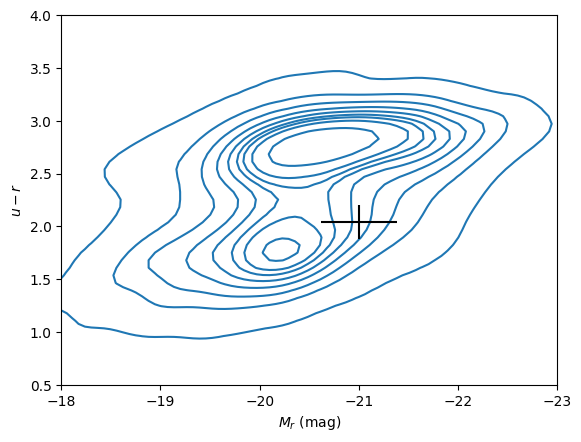

In [36]:
# TODO: Copy your code from the last cell here.
# Then add a line of code that plots the Milky Way as a black point with errorbars!
# Hint: use the `plt.errorbar()` function!

sns.kdeplot(x=sdss['M_r'], y=sdss['u']-sdss['r'])

plt.errorbar(x=-21,y=2.043, xerr=0.38,yerr=0.16,color='black')

plt.xlabel(r'$M_{r}$ (mag)')
plt.ylabel(r'$u-r$')
plt.xlim(-18,-23)
plt.ylim(0.5,4.0)
plt.show()

***Questions***

3. From the density plot, we can see the two galaxy populations that we talked about in class: the "red sequence" and the "blue cloud." Where are these two populations on the color-magnitude diagram shown above?

*The blue cloud is the lower cluster of distribution, and the red sequence is the horizontal upper cluster.*

4. Where is the "green valley" in this plot?

*The green valley is to the right of both clusters, approximately within -20.5 to -22 Mr and 2.0 to 2.5 u-r.*

5. Which population is the Milky Way in? Is that surprising to you? Why or why not?

*The Milky Way is between the blue cloud and the green valley. This is surprising to us because there are so few galaxies in the green cluster, and we know that the Milky Way is a spiral galaxy.*


## Submitting Colab notebooks for grading

Before submitting any notebook for grading, please follow the following steps:

1) Make sure the names of all group members are in a markdown cell at the top of the file.

2) Save the notebook as a PDF. Depending on what program you use, you may need to use some variation of the following command: "File -> Print -> Save to PDF". **Make sure all code/plots are visible and aren't getting cut off from the margins!** In Google Colab, the easiest way to do this is by playing with the margin sizes. Also if using Colab, make sure the "Background graphics" option is checked under the "More options" tab.

3) Upload the PDF to Gradescope. **Make sure all group member's names are on the Gradescope submission.**